# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [42]:
# import numpy and pandas

import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.stats.weightstats import ztest
from scipy import stats
from scipy.stats import t
import numpy as np

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents. Please, load the data using Ironhack's database (db: employees, table: employees_advanced).

In [2]:
# Your code here:
salaries = pd.read_csv('../data/Current_Employee_Names__Salaries__and_Position_Titles.csv')
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               33183 non-null  object 
 1   Job Titles         33183 non-null  object 
 2   Department         33183 non-null  object 
 3   Full or Part-Time  33183 non-null  object 
 4   Salary or Hourly   33183 non-null  object 
 5   Typical Hours      8022 non-null   float64
 6   Annual Salary      25161 non-null  float64
 7   Hourly Rate        8022 non-null   float64
dtypes: float64(3), object(5)
memory usage: 2.0+ MB


Examine the `salaries` dataset using the `head` function below.

In [3]:
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [4]:
salaries['Salary or Hourly'].value_counts()

Salary or Hourly
Salary    25161
Hourly     8022
Name: count, dtype: int64

In [5]:
salaries_annual=salaries[salaries['Salary or Hourly']=='Salary']
salaries_hourly=salaries[salaries['Salary or Hourly']=='Hourly']

<Axes: >

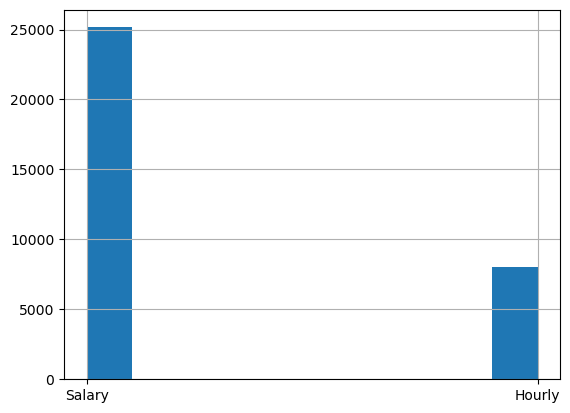

In [6]:
salaries['Salary or Hourly'].hist()

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [8]:
# Your code here:
salaries['Salary or Hourly'].value_counts()

Salary or Hourly
Salary    25161
Hourly     8022
Name: count, dtype: int64

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [13]:
# Your code here:
salaries.groupby('Department')['Name'].nunique()


Department
ADMIN HEARNG                39
ANIMAL CONTRL               81
AVIATION                  1629
BOARD OF ELECTION          107
BOARD OF ETHICS              8
BUDGET & MGMT               46
BUILDINGS                  269
BUSINESS AFFAIRS           171
CITY CLERK                  84
CITY COUNCIL               411
COMMUNITY DEVELOPMENT      207
COPA                       116
CULTURAL AFFAIRS            65
DISABILITIES                28
DoIT                        99
FAMILY & SUPPORT           614
FINANCE                    560
FIRE                      4631
GENERAL SERVICES           978
HEALTH                     488
HUMAN RELATIONS             16
HUMAN RESOURCES             79
INSPECTOR GEN               87
LAW                        407
LICENSE APPL COMM            1
MAYOR'S OFFICE              85
OEMC                      2101
POLICE                   13353
POLICE BOARD                 2
PROCUREMENT                 92
PUBLIC LIBRARY            1015
STREETS & SAN             21

In [11]:
salaries['Department'].value_counts()

Department
POLICE                   13414
FIRE                      4641
STREETS & SAN             2198
OEMC                      2102
WATER MGMNT               1879
AVIATION                  1629
TRANSPORTN                1140
PUBLIC LIBRARY            1015
GENERAL SERVICES           980
FAMILY & SUPPORT           615
FINANCE                    560
HEALTH                     488
CITY COUNCIL               411
LAW                        407
BUILDINGS                  269
COMMUNITY DEVELOPMENT      207
BUSINESS AFFAIRS           171
COPA                       116
BOARD OF ELECTION          107
DoIT                        99
PROCUREMENT                 92
INSPECTOR GEN               87
MAYOR'S OFFICE              85
CITY CLERK                  84
ANIMAL CONTRL               81
HUMAN RESOURCES             79
CULTURAL AFFAIRS            65
BUDGET & MGMT               46
ADMIN HEARNG                39
DISABILITIES                28
TREASURER                   22
HUMAN RELATIONS             

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [19]:
# Your code here:

salaries_clean = salaries.dropna(subset=['Hourly Rate'])
hypothesis_mean=30


Z_score, p_value = ztest(salaries_clean['Hourly Rate'], value=hypothesis_mean)

print(f'Z_score: {Z_score}', f'\np-value: {p_value}')

#p-valor menor que 5%, rechazamos hipotesis nula

Z_score: 20.6198057854942 
p-value: 1.8228873859286195e-94


We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [28]:
# Your code here:

police_salaries = salaries[salaries['Department'] == 'POLICE']

salaries_clean > police_salaries.dropna(subset=['Annual Salary'])

hypothesis_mean=86000


Z_score, p_value = ztest(salaries_clean['Annual Salary'], value=hypothesis_mean)

print(f'Z_score: {Z_score}', f'\np-value: {p_value}')
#p-valor menor que 5%, rechazamos hipotesis nula

Z_score: 3.081997005712994 
p-value: 0.002056169057509571


Using the `crosstab` function, find the department that has the most hourly workers. 

In [32]:

cross_tab = pd.crosstab(salaries['Department'], salaries['Salary or Hourly'])
hourly_workers = cross_tab['Hourly']

department_most_hourly_workers = hourly_workers.idxmax()

department_most_hourly_workers


'STREETS & SAN'

The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [37]:
hypothesized_mean = 35  
alpha = 0.05  

hourly_workers_department = salaries[(salaries['Department'] == department_most_hourly_workers) & 
                                     (salaries['Salary or Hourly'] == 'Hourly')]
t_statistic, p_value = stats.ttest_1samp(hourly_workers_department['Hourly Rate'], hypothesized_mean, alternative='less')

print("T-statistic:", t_statistic)
print("P-value:", p_value)

#p-valor menor que 5%, rechazamos hipotesis nula

T-statistic: -9.567447887848152
P-value: 1.6689265282353859e-21


# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [43]:
# Your code here:
sample_mean = salaries['Hourly Rate'].mean()
sample_std = salaries['Hourly Rate'].std()

standard_error = sample_std / np.sqrt(len(salaries))

confidence_level = 0.95


degrees_of_freedom = len(salaries) - 1


alpha = 1 - confidence_level
t_critical = t.ppf(1 - alpha / 2, degrees_of_freedom)


margin_of_error = t_critical * standard_error

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"95% Confidence Interval for the mean hourly wage: ({lower_bound}, {upper_bound})")



95% Confidence Interval for the mean hourly wage: (32.65822828339105, 32.918887149169414)


Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [44]:
police_salaries = salaries[(salaries['Department'] == 'POLICE') & (salaries['Salary or Hourly'] == 'Salary')]

sample_mean = police_salaries['Annual Salary'].mean()
sample_std = police_salaries['Annual Salary'].std()

standard_error = sample_std / np.sqrt(len(police_salaries))

confidence_level = 0.95

degrees_of_freedom = len(police_salaries) - 1

alpha = 1 - confidence_level
t_critical = t.ppf(1 - alpha / 2, degrees_of_freedom)

margin_of_error = t_critical * standard_error

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"95% Confidence Interval for the mean annual salary of police employees: ({lower_bound}, {upper_bound})")

95% Confidence Interval for the mean annual salary of police employees: (86177.05631531785, 86795.77269094893)


# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [45]:
# Your code here:

from statsmodels.stats.proportion import proportions_ztest

num_hourly_workers = np.sum(salaries['Salary or Hourly'] == 'Hourly')
total_workers = len(salaries)

null_proportion = 0.25 

stat, p_value = proportions_ztest(num_hourly_workers, total_workers, value=null_proportion)

print("Test Statistic:", stat)
print("P-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis. The number of hourly workers in the City of Chicago is significantly different from 25%.")
else:
    print("Fail to reject the null hypothesis. The number of hourly workers in the City of Chicago is not significantly different from 25%.")




Test Statistic: -3.5099964213703005
P-value: 0.0004481127249057967
Reject the null hypothesis. The number of hourly workers in the City of Chicago is significantly different from 25%.
